# Exercises on 3D animations with matrix transformations

## Exercise 5.1
Write a function `infer_matrix(n, transformation)` that takes a dimension and a function that is a vector transformation assumed to be linear and returns an nxn square matrix that represents the linear transformation.

Note that the given `transformation` **has** to be linear, otherwise, the returned matrix will not represent the transformation.

We know that to completely specify a linear transformation, it is enough to specify how it transforms the vectors of the standard basis.

Thus, what we have to do is is apply the given transformation to the standard basis of the given dimension, collect the results in columns, and return that matrix.

Let's start with a supporting function that will return the standard basis vectors.

For the standard basis vectors, we need to come up with a collection of tuples on which the coordinate 1 is shifted in position for every vector.

```
n = 2:
    e1 = (1, 0)
    e2 = (0, 1)
    standard_basis = [e1, e2]

n = 3:
    e1 = (1, 0, 0)
    e2 = (0, 1, 0)
    e3 = (0, 0, 1)
    standard_basis = [e1, e2, e3]

n = 4:
    e1 = (1, 0, 0, 0)
    e2 = (0, 1, 0, 0)
    e3 = (0, 0, 1, 0)
    e4 = (0, 0, 0, 1)
    standard_basis = [e1, e2, e3, e4]
```

Now, we're beginning to see that we will need a couple of nested iterations: one over the number of dimensions given (number of standard basis vectors) and an inner one to build the elements of each of the vectors.

Let's start with a *procedural*, non-Pythonic way:

In [3]:
def standard_basis(dimension):
    standard_basis = []
    for i in range(0, dimension):
        e = []
        for j in range(0, dimension):
            if (i == j):
                e.append(1)
            else:
                e.append(0)
        standard_basis.append(e)
    return standard_basis

print(standard_basis(2))
print(standard_basis(3))
print(standard_basis(4))

[[1, 0], [0, 1]]
[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


That solution more or less works, but we are only using lists instead of tuples, and it cries for a more succinct implementation.

Let's give it a second try with the hint that list and tuple comprehensions in Python allows for using if conditions in their definition:

In [7]:
def standard_basis(dimension):
    standard_basis = [
        tuple(1 if i == j else 0 for j in range(0, dimension)) 
        for i in range(0, dimension)
        ]
    return standard_basis

print(standard_basis(2))
print(standard_basis(3))
print(standard_basis(4))

[(1, 0), (0, 1)]
[(1, 0, 0), (0, 1, 0), (0, 0, 1)]
[(1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1)]


Note that for readability purposes, the author recommends defining a support function to return the standard basis vector, but either way is fine.



In [8]:
def standard_basis(dimension):
    def standard_basis_vector(i):
        return tuple(1 if i == j else 0 for j in range(0, dimension))
    standard_basis = [standard_basis_vector(i) for i in range(0, dimension)]
    return standard_basis

print(standard_basis(2))
print(standard_basis(3))
print(standard_basis(4))

[(1, 0), (0, 1)]
[(1, 0, 0), (0, 1, 0), (0, 0, 1)]
[(1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1)]


In [ ]:
Now, we need to define our main function:

In [9]:
def infer_matrix(n, transformation):
    transformations_on_standard_basis = [transformation(ei) for ei in standard_basis(n)]
    return tuple(zip(*transformations_on_standard_basis))

Note that we had to use `zip(*matrix)` to convert the matrix rows into columns.

Let's validate it with a transformation like `rotate_z_by(pi / 2)`:

In [12]:
from my_transformations import rotate_z_by
from math import pi

infer_matrix(3, rotate_z_by(pi / 2))

((6.123233995736766e-17, -1.0, 0.0),
 (1.0, 1.2246467991473532e-16, 0.0),
 (0, 0, 1))

We can validate it also visually, by using this function to rotate our teapot:

In [19]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from math import sin, cos
from my_transformations import rotate_z_by, polygon_map
from my_matrices import multiply_matrix_vector
from math import pi

def standard_basis(dimension):
    def standard_basis_vector(i):
        return tuple(1 if i == j else 0 for j in range(0, dimension))
    standard_basis = [standard_basis_vector(i) for i in range(0, dimension)]
    return standard_basis

def infer_matrix(n, transformation):
    transformations_on_standard_basis = [transformation(ei) for ei in standard_basis(n)]
    return tuple(zip(*transformations_on_standard_basis))

rotation_matrix = infer_matrix(3, rotate_z_by(pi / 2))

def matrix_rotate_z_by(angle_radians):
    matrix_transformation = infer_matrix(3, rotate_z_by(angle_radians))
    def new_function(v):
        return multiply_matrix_vector(matrix_transformation, v)
    return new_function

draw_model(polygon_map(matrix_rotate_z_by(pi / 2), load_triangles()))

SystemExit: 0

In [ ]:
Note that as this rotation matrix does not depend on time, the teapot is not animated, but rather rotated once.

# Exercise 5.2

What is the result of the following product?

$
\begin{pmatrix}
1.3 & -0.7 \\
6.5 & 3.2
\end{pmatrix}
\begin{pmatrix}
-2.5 \\
0.3
\end{pmatrix}
$

The result will be a column vector with dimension 2, with $ a_{11} = (1.3, -0.7) \cdot (-2.5, 0.3) $ and $ a_{21} = (6.5, 3.2) \cdot (-2.5, 0.3) $

$
\begin{pmatrix}
1.3 & -0.7 \\
6.5 & 3.2
\end{pmatrix}
\begin{pmatrix}
-2.5 \\
0.3
\end{pmatrix} = \begin{pmatrix}
-3.46 \\
-15.29
\end{pmatrix}
$


Let's validate it with our Python functions:

In [21]:
from my_matrices import multiply_matrix_vector

m = (
    (1.3, -0.7),
    (6.5, 3.2)
    )
v = (-2.5, 0.3)

print(multiply_matrix_vector(m, v))

(-3.46, -15.29)


# Exercise 5.3

Write a `random_matrix(...)` function that generates matrices of a specified size with random whole number entries. Use the function to generate five pairs or 3x3 matrices. Multiply each of the pairs together by hand for practice and then check your work with the `matrix_multiply(...)` function.

Let's define the `random_matrix(...)` function first:

From the initial chapter we know that we can get random ints using:

```python
import random

print(random.randint(0, 10))
```

This can also be written as:

```python
from random import randint

print(randint(0, 10))
```

In [3]:
from random import randint

def random_matrix(num_rows, num_cols, min_int_inc=0, max_int_inc=10):
    def get_random_in_range(min_val, max_val):
        def new_function():
            return randint(min_val, max_val + 1)
        return new_function
    rand = get_random_in_range(min_int_inc, max_int_inc)
    result = tuple(
        tuple(rand() for i in range(0, num_cols))
        for j in range(0, num_rows)
    )
    return result

print(random_matrix(2, 2))
print(random_matrix(4, 3))
print(random_matrix(2, 4, -5, 5))


((2, 10), (0, 4))
((2, 10, 11), (8, 6, 11), (11, 3, 11), (4, 3, 8))
((-1, 5, 3, 0), (-4, 6, -1, -1))


Now, let's generate 5 pairs of 3-by-3 matrices:

In [7]:
from my_matrices import random_matrix

for i in range(0, 5):
    print(random_matrix(3, 3, min_int_inc=-2, max_int_inc=2))
    print(random_matrix(3, 3, min_int_inc=-2, max_int_inc=2))
    print()


((2, -1, -2), (0, -2, 1), (0, 0, -1))
((0, 0, 0), (1, 2, 0), (2, 3, 2))

((2, 3, 2), (1, -1, -2), (3, 0, 3))
((1, 1, -2), (2, -1, -2), (0, 0, -1))

((0, 3, 0), (-2, 3, -1), (-1, -2, 3))
((1, 1, 0), (3, -1, -1), (-1, 2, -2))

((0, 0, 0), (-1, 3, 3), (2, 3, 0))
((-1, 2, 1), (2, -2, -2), (-2, -1, 0))

((-1, 1, 3), (-1, 0, 2), (2, 1, 0))
((0, 2, 1), (-1, 3, 2), (3, -2, 0))



In [9]:
from my_matrices import matrix_multiply

matrix_multiply(((0, 1, 0), (-2, -1, 0), (3, 2, 1)), ((3, 3, 0), (0, -2, -2), (1, 0, -2)))

((0, -2, -2), (-6, -4, 2), (10, 5, -6))

# Exercise 5.4

For each of the matrices from the previous exercise, multiply them in the opposite order. Do you get the same result?

In [10]:
from my_matrices import matrix_multiply

matrix_multiply(((3, 3, 0), (0, -2, -2), (1, 0, -2)), ((0, 1, 0), (-2, -1, 0), (3, 2, 1)))

((-6, 0, 0), (-2, -2, -2), (-6, -3, -2))

So, no, the result is not the same.

# Exercises 5.5

In either 2D or 3D, there is a boring but important transformation called the *identity transformation* that takes in a vector and returns the same vector as output. This transformation is linear because it preserves (obviously) a linear combination of vectors. What are the matrices representing the identity transformation in 2D and 3D respectively?

We know from the concepts section that in order to compute the matrix representing a transformation we apply the transformation to the vectors of the standard basis and place the result in the columns of the matrix.

Therefore, let $ I_{d=2} $ the identity transformation for the 2D plane, $ I_{d=3} $ the identity transformation for the 3D space.

Therefore:
$
I_{d=2} = \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix} \\
I_{d=3} = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \\
$

# Exercise 5.6

Apply the matrix ((2, 1, 1), (1, 2, 1), (1, 1, 2)) to all the vectors defining the teapot. What happens to the teapot and why?

In [16]:
from my_teapot import load_triangles
from my_draw_model import draw_model
from my_transformations import polygon_map
from my_matrices import multiply_matrix_vector

transformation_matrix = ((2, 1, 1), (1, 2, 1), (1, 1, 2))

def apply_matrix_transformation(matrix):
    def new_function(v):
        return multiply_matrix_vector(matrix, v)
    return new_function

draw_model(polygon_map(apply_matrix_transformation(transformation_matrix), load_triangles()))

SystemExit: 0

The teapot seems to have been stretched out into the region where x, y and z are all positive. This happens because the transformation is changing:

$
A(e1) = (2, 1, 1) \\
A(e2) = (1, 2, 1) \\
A(e3) = (1, 1, 2)
$

That is, all the vectors will be stretched into that region where x > 0, y > 0, z > 0

# Exercise 5.7

Implement multiply_matrix_vector in a different way using two nested comprehensions: one traversing the rows of the matrix, and one traversing the entries of each rows



It is asked to perform the sums and products as if we were using the mnemonic recipes. The only benefit is that it is a zero-dependency solution

In [22]:
def multiply_matrix_vector(matrix,vector):
    return tuple(
        sum(vector_entry * matrix_entry for vector_entry, matrix_entry in zip(row,vector)       ) 
        for row in matrix)

# (0, -6, 10)
print(multiply_matrix_vector(
    ((0, 1, 0),
    (-2, -1, 0),
    (3, 2, 1)
    ),
    (3, 0, 1))
)

(0, -6, 10)


# Exercise 5.8

Implement `multiply_matrix_vector(...)` yet another way using the fact that the output coordinates are the dot products of the input matrix rows with the input vector.

In [25]:
from my_vectors import dot

def multiply_matrix_vector(m, v):
    return tuple(dot(row, v) for row in m)

# (0, -6, 10)
print(multiply_matrix_vector(
    ((0, 1, 0),
    (-2, -1, 0),
    (3, 2, 1)
    ),
    (3, 0, 1))
)

(0, -6, 10)


# Exercise 5.9

We know that any linear transformation can be represented by a matrix. Demonstrate the converse fact:
> all matrices represent linear transformations. That is, show that matrix multiplication preserves sums and scalar multiples.

Hint: start with the explicit formulas for multiplying a 2D vector by a 2x2 matrix and multiplying a 3D vector by a 3x3 matrix.

The algebraic demonstration is easy but long, the idea is to demonstrate that:

Let $ A $ a matrix, $ v $, $ w $ vectors such that:
$
A = \begin{pmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{pmatrix} \\
v = (v_x, v_y, v_z), \hspace{1ex} w = (w_x, w_y, w_z)
$

You have to demonstrate that:
$
A(a \cdot v + b \cdot w) = a \cdot Av + b \cdot Bw
$

which is evident as:
$
A(a \cdot v + b \cdot w) = \begin{pmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
a \cdot v_x + b \cdot w_x \\
a \cdot v_y + b \cdot w_y \\
a \cdot v_z + b \cdot w_z
\end{pmatrix}
$

As a consequence, all 3x3 matrices are linear transformations, as they preserve linear combinations.


## Exercise 5.10

Consider that following matrices representing transformations:

$
A = \begin{pmatrix}
1 & 1 & 0 \\
1 & 0 & 1 \\
1 & -1 & 1
\end{pmatrix}, \hspace{1ex} B = \begin{pmatrix}
0 & 2 & 1 \\
0 & 1 & 0 \\
1 & 0 & -1
\end{pmatrix}
$

Write a function `compose_a_b(...)` that executes the composition of the linear transformation for $ A $ and the linear transformation for $ B $.
Then use the `infer_matrix(...)` function on the result to check that those results match.

We know from the concept section that composition of linear transformations is the same as matrix multiplication.

Therefore:

In [1]:
from my_matrices import *

def compose_a_b(a, b):
    composition_matrix = matrix_multiply(a, b)
    def new_function(v):
        return multiply_matrix_vector(composition_matrix, v)
    return new_function

a = (
    (1, 1, 0),
    (1, 0, 1),
    (1, -1, 1)
)

b = (
    (0, 2, 1),
    (0, 1, 0),
    (1, 0, -1)
)

# ((0, 3, 1), (1, 2, 0), (1, 1, 0))
print(matrix_multiply(a, b))

# (0, 1, 1)
print(compose_a_b(a, b)((1, 0, 0)))

# (3, 2, 1)
print(compose_a_b(a, b)((0, 1, 0)))

# (1, 0, 0)
print(compose_a_b(a, b)((0, 0, 1)))

# ((0, 3, 1), (1, 2, 0), (1, 1, 0))
print(infer_matrix(3, compose_a_b(a, b)))


((0, 3, 1), (1, 2, 0), (1, 1, 0))
(0, 1, 1)
(3, 2, 1)
(1, 0, 0)
((0, 3, 1), (1, 2, 0), (1, 1, 0))


## Exercise 5.12

Find two 2x2 matrices, neither of which is the identity matrux, but whose product is the identity matrix.

We need to find two matrices $ A $ and $ B $ such that:

$
AB = \begin{pmatrix}
1 & 0 \\
0 & 1 
\end{pmatrix}
$

And we know that:

$
AB = \begin{pmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{pmatrix}
\begin{pmatrix}
b_{00} & b_{01} \\
b_{10} & b_{11}
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
0 & 1 
\end{pmatrix}
$

That will however lead to quite a messy set of equations, so there is a much better way to think of solving this problem using the properties of linear transformations
> multiplying two matrices together is the same as composing linear transformations &mdash; if two composed transformations lead to the identity matrix, it means they return the original vector.

Thus, we can think of matrices representing transformations that when composed, return the original vector:
+ $ A $ scales the vector by 2, $ B $ scales the vector by $ \frac{1}{2} $
+ $ A $ rotates the vector 90° and $ B $ rotates the vector 270°

For the first case:
$
A = \begin{pmatrix}
2 & 0 \\
0 & 2
\end{pmatrix}, \hspace{1ex} B = \begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{pmatrix}
$

For the second case:
$
A = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}, \hspace{1ex} B = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
$

| NOTE: |
| :---- |
| Remember that to come up with the matrix representing a linear transformation, you have consider that the first column of the matrix represent the effect of the transformation on the $ e1 $ vector, the second column is the result of the transformation on $ e2 $, etc. |

## Exercise 5.12

We can multiply a square matrix by itself any number of times. We can think of successive matrix multiplications as *"raising a matrix to a power"*. For example, $ AA = A² $, $ AAA = A³ $, etc.

Write a `matrix_power(power, matrix)` function that raises a matrix to the specified whole number power.

In [3]:
from my_matrices import *

def matrix_power(power, matrix):
    temp_result = matrix
    for i in range(0, power):
        temp_result = matrix_multiply(matrix, matrix)
    return temp_result

a = (
    (1, 2),
    (3, 4)
)

# ((7, 10), (15, 22))
print(matrix_power(2, a))

# ((7, 10), (15, 22))
print(matrix_multiply(a, a))

((7, 10), (15, 22))
((7, 10), (15, 22))


In [ ]:
It can also be coded using recursion:

In [6]:
from my_matrices import *

def matrix_power(power, matrix):
    if power == 1:
        return matrix
    else:
        return matrix_multiply(matrix_power(power - 1, matrix), matrix)
a = (
    (1, 2),
    (3, 4)
)

# ((7, 10), (15, 22))
print(matrix_power(2, a))

# ((7, 10), (15, 22))
print(matrix_multiply(a, a))

((7, 10), (15, 22))
((7, 10), (15, 22))


## Exercise 5.13

What are the dimensions of this matrix?

$
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 \\
6 & 7 & 8 & 9 & 10 \\
11 & 12 & 13 & 14 & 15
\end{pmatrix}
$

It is a 3x5 (3-by-5) matrix, as it has 3 rows and 5 columns.

## Exercise 5.14

What are the dimensions of a 2D column vector considered as a matrix? What about a 2D row vector? A 3D column vector? A 3D row vector?

+ What are the dimensions of a 2D column vector considered as a matrix? 2x1
+ What about a 2D row vector? 1x2
+ A 3D column vector?  3x1
+ A 3D row vector? 1x3

# Exercise 5.15

Many of our vector and matrix operations make use of the Python `zip(...)` function. When given input lists of different sizes, this function truncates the longer of the two rather than failing.

This means that when we pass invalid inputs, we get meaningless results back in our matrix and vector operations. For example, the dot product between a 2D vector and a 3D vector should fail, but our `dot(...)` function returns something anyway.

1. Validate that `dot(...)` does not fail when passing vectors that could not be multiplied.
2. Validate that `matrix_multiply(...)` return values when passing matrices that cannot be multiplied.
3. Add safeguards to all our vector and matrix arithmetic functions so that they don't fail when passing invalid arguments.

Let's solve point 1 and 2 first:

In [2]:
# *_old before adding safeguards
from my_vectors_old import dot
from my_matrices_old import matrix_multiply

# before adding safeguards => returns 2, because the longer vector is truncated to (1, 1)
print(dot((1, 1), (1, 1, 1)))

# before adding safeguards => returns ((-11, -14, -17, -20), (-29, -38, -47, -56))
print(matrix_multiply(
    (
        (1, 2, 3),
        (4, 5, 6)
    ),
    (
        (-1, -2, -3, -4),
        (-5, -6, -7, -8)
    )
))

2
((-11, -14, -17, -20), (-29, -38, -47, -56))


For point #3, a new implementation of the libraries and unit tests have been created in [e00-my-libs](../e00-my-libs) and copied in this folder, so that point 1 and 2 no longer return invalid values, but instead fail.

In [7]:
from my_vectors import dot
from my_matrices import matrix_multiply

# before adding safeguards => returns 2, because the longer vector is truncated to (1, 1)
try:
    dot((1, 1), (1, 1, 1))
except ValueError:
    print('ValueError')
except TypeError:
    print('TypeError')

# before adding safeguards => returns ((-11, -14, -17, -20), (-29, -38, -47, -56))
try:
    matrix_multiply(
    (
        (1, 2, 3),
        (4, 5, 6)
    ),
    (
        (-1, -2, -3, -4),
        (-5, -6, -7, -8)
    )
    )

except TypeError:
    print('TypeError')
except ValueError:
    print('ValueError')

ValueError
TypeError


## Exercise 5.16

Which of the following are valid matrix products? For those that are valid, what dimension is the product matrix?

a)
$
\begin{pmatrix}
10 & 0 \\
3 & 4
\end{pmatrix}
\begin{pmatrix}
8 & 2 & 3 & 6 \\
7 & 8 & 9 & 4 \\
5 & 7 & 0 & 9 \\
3 & 3 & 0 & 2
\end{pmatrix}
$

This multiplication of matrices is not possible because the number of columns of the first matrix, does not match the number of rows of the second matrix:

b)
$
\begin{pmatrix}
0 & 2 & 1 & -2 \\
-2 & 1 & -2 & -1
\end{pmatrix}
\begin{pmatrix}
-3 & 5 \\
1 & -1 \\
-4 & -4 \\
-2 & -4
\end{pmatrix}
$

This multiplication is possible and the resulting matrix will be a 2x2 matrix.

c)
$
\begin{pmatrix}
1 \\
3 \\
0
\end{pmatrix}
\begin{pmatrix}
3 & 3 & 5 & 1 & 3 & 0 & 5 & 1
\end{pmatrix}
$

This multiplication is possible because the number of columns of the first matrix is one (it is a column vector), and the number of rows of the second matrix is one (it is row vector).

The resulting matrix will be a 3x8 matrix.


d)
$
\begin{pmatrix}
9 & 2 & 3 \\
0 & 6 & 8 \\
7 & 7 & 9
\end{pmatrix}
\begin{pmatrix}
7 & 8 & 9 \\
10 & 7 & 8
\end{pmatrix}
$

This multiplication is not possible because the number of columns of the first matrix (3) does not match the number of rows of the second one (2)


## Exercise 5.17

A matrix with 15 total entries is multiplied by a matrix with 6 total entries. What are the dimensions of the two matrices, and what is the dimension of the product matrix?

Let's assume that the first matrix is $ m \times n $ and the second matrix is $n \times k $.

Then:

$ 
m \cdot n = 15 \\
n \cdot k = 6
$

There are two possible solutions:

a)
$ m = 5, \hspace{1ex} n = 3, \hspace{1ex} k = 2 $, result = $ 5 \times 2 $ matrix

b)
$ m = 15, \hspace{1ex} n = 1, \hspace{1ex} k = 6 $, result = $ 15 \times 6 $ matrix


# Exercise 5.18

Write a function that turns a column vector into a row vector, or vice versa. Flipping a matrix on its side like this is called transposition and the resulting matrix is called the transpose of the original.

We've seen before that the `zip(...)` operation is the magic trick for the transposition.

Let's see why:

In [12]:
# basic use case, note that the longer list gets truncated
list_a = (1, 3, 5)
list_b = (2, 4, 6, 8)

list(zip(list_a, list_b))

# passing three lists
list_a = (1, 3, 5)
list_b = (2, 4, 6, 8)
list_c = ('a', 'b', 'c')

list(zip(list_a, list_b, list_c))

# passing a single list transposes:
# According to the official docs: https://docs.python.org/3.3/library/functions.html#zip
# `zip(*iterables)` when gave a single iterable argument, it returns an iterator of 1-tuples
# corresponding to each of the elements of the given iterable
list_a = (1, 3, 5)
list(zip(list_a))

[(1,), (3,), (5,)]

Thus, thanks to how the `zip(...)` function behaves when given a single argument will help doing the transposition for matrices a vectors written as matrices:


In [23]:
def transpose(matrix):
    return tuple(zip(*matrix))

a = (
    (1, 2, 3),
    (4, 5, 6))

# (
#   (1, 4), 
#   (2, 5), 
#   (3, 6)
# )
print(transpose(a))    

# it works with vectors too, but you have to write them as matrices (tuples of tuples)
row_vector = ((1, 2, 3),)
print(transpose(row_vector))

# this will fail as we're not passing a tuple of tuples
vector = (1, 2, 3)
# transpose(vector)

# this will work well, as we're passing a tuple of tuples
col_vector = (
    (1,),
    (2,),
    (3,)
    )
print(transpose(col_vector))

((1, 4), (2, 5), (3, 6))
((1,), (2,), (3,))
((1, 2, 3),)


Note however, that we could transpose a regular vector (tuple) using `zip(...)` without using the `*` operator:

In [24]:
vector = (1, 2, 3)

tuple(zip(vector))

((1,), (2,), (3,))

We can then define both functions to help us do any kind of transpositions:

In [9]:
from my_matrices import transpose, transpose_row_vector

v = (1, 2, 3)
vt = transpose_row_vector(v)

print(vt)

a = (
    (1, 2, 3),
    (4, 5, 6))

at = transpose(a)
print(at)

w = ((1, ),
(2, ),
(3, ))

wt = transpose(w)
print(wt)

unpacked_wt = wt[0]
print(unpacked_wt)

((1,), (2,), (3,))
((1, 4), (2, 5), (3, 6))
((1, 2, 3),)
(1, 2, 3)


# Exercise 5.19

Draw a picture that shows a 10x8 and a 5x8 matrix can't be multiplied in that order.

## Exercise 5.20

We want to multiply three matrices together: $ A $ is $ 5 \times 7 $, $ B $ is $ 2 \times 3 $ and C is $ 3 \times 5 $. What order can they be multiplied, and what is the size of the result?


Two matrices can be multiplied when they number of columns of the first matrix matches the number of rows of the second. The resulting matrix is the number of rows of the first matrix by the number of cols of the second.

Therefore, one way to multiply those matrices will be:

$ 
B C A
$

$ B C $ gives a resulting matrix of $ 2 \times 5 $ and therefore, the resulting matrix will be $ 2 \times 7 $.

# Exercise 5.21

Projection onto the $ y, z $ plane and onto the $ x, z $ plane are also linear maps from 3D to 2D. What are their matrices?

We know from the concepts section that a linear transformation matrix results from applying the transformation to the standard basis vectors.

Therefore:

$
P_{x=0} = \begin{pmatrix}
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$

$
P_{y=0} = \begin{pmatrix}
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix}
$

We can validate it, alebrically doing:

$
P_{x=0} = \begin{pmatrix}
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
x \\
y \\
z
\end{pmatrix} = \begin{pmatrix}
y \\
z
\end{pmatrix}
$

$
P_{y=0} = \begin{pmatrix}
1 & 0 & 0 \\
0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
x \\
y \\
z
\end{pmatrix} = \begin{pmatrix}
x \\
z
\end{pmatrix}
$

# Exercise 5.22

Show by example that the `infer_matrix(...)` function can create matrices for linear functions whose inputs and outputs are different dimensions.

Let's try with the projection in the $ z=0 $ plane:

In [2]:
from my_matrices import infer_matrix

def project_xy(v_3d):
    x, y, z = v_3d
    return (x, y)


inferred_linear_transformation = infer_matrix(3, project_xy)
print(inferred_linear_transformation) 

((1, 0, 0), (0, 1, 0))


# Exercise 5.23

Write a $ 4 \times 5 $ matrix that acts on a 5D vector by deleting the third of its five entries, thereby producing a 4D vector.

For example, $ P((1, 2, 3, 4, 5)) $ should return $ (1, 2, 4, 5) $

We know from the concepts section that linear maps matrices are built in the same way as linear transformations &mdash; by applying the transformation to the vectors of the standard basis.

Therefore:

$
P = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}
$

In [1]:
from my_matrices import multiply_matrix_vector
linear_map = (
    (1, 0, 0, 0, 0),
    (0, 1, 0, 0, 0),
    (0, 0, 0, 1, 0),
    (0, 0, 0, 0, 1)
)

v = (1, 2, 3, 4, 5)

transformed_v = multiply_matrix_vector(linear_map, v)
print(transformed_v)


(1, 2, 4, 5)


# Exercise 5.24

Consider the vector of six variables $ (l, e, m, o, n, s) $. Find the matrix for the linear transformation that acts on this vector to produce the vector $ (s, o, l, e, m, n) $ as result.

Note how the linear transformation is a *reorganization* of the letters of the first vector.

+ 1st entry is transformed into the 3rd one
+ 2nd entry is transformed into the 4th one
+ 3rd entry is transformed into the 5th one
+ 4th entry is transforrmed into the 2nd one
+ 5th entry is transformed into the 6th one
+ 6th entry is transformed into the first one

Then, even when we don't know about the standard basis vectors, we can do:

$
L = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix}
$

And thus:

$
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix} \begin{pmatrix}
l \\
e \\
m \\
o \\
n \\
s
\end{pmatrix} = \begin{pmatrix}
s \\
o \\
l \\
e \\
m \\
n
\end{pmatrix}
$

## Exercise 5.25

What valid products can be made from the matrices, $ M $, $ N $, $ P $, and $ Q $ from section 5.2.5. Include in your consideration the products of matrices with themselves. For the products that are valid, what are the dimensions of the matrix products?

From section 5.2.5 we see that:
+ M is a $ 3 \times 3 $ matrix
+ N is a $ 2 \times 2 $ matrix
+ P is a $ 2 \times 3 $ matrix
+ Q is a $ 2 \times 3 $ matrix

+ $ M M $ is a valid product, result matrix is $ 3 \times 3 $ matrix
+ $ M N $ is not a valid product
+ $ M P $ is not a valid product
+ $ M Q $ is not a valid product

+ $ N M $ is not a valid product
+ $ N N $ is a valid product, result matrix is $ 2 \times 2 $ matrix
+ $ N P $ is a valid product, result matrix is $ 2 \times 3 $ matrix
+ $ N Q $ is a valid product, result matrix is $ 2 \times 3 $ matrix

+ $ P M $ is a valid product, result matrix is $ 2 \times 3 $ matrix
+ $ P N $ is not a valid product
+ $ P P $ is not a valid product
+ $ P Q $ is not a valid product

+ $ Q M $ is a valid product, result matrix is $ 2 \times 3 $ matrix
+ $ Q N $ is not a valid product
+ $ Q P $ is not a valid product
+ $ Q Q $ is not a valid product



## Exercise 5.26

Show that the translation matrix does not work if you place the 2D figure in the plane $ z = 2 $. What happens?

The exercise consists in using the same translation matrix:

$
\begin{pmatrix}
1 & 0 & a \\
0 & 1 & b \\
0 & 0 & 1 
\end{pmatrix}
$

but *upgrading* the vector to $ (x, y, 2) $.

Algebraically, we see:

$
\begin{pmatrix}
1 & 0 & a \\
0 & 1 & b \\
0 & 0 & 1 
\end{pmatrix} \begin{pmatrix}
x \\
y \\
2
\end{pmatrix} = \begin{pmatrix}
x + 2a \\
y + 2b
\end{pmatrix}
$

Therefore, the vector will translated twice as far.

Let's see what happens when we use $ (1, 1) $ as the translation vector and that matrix:

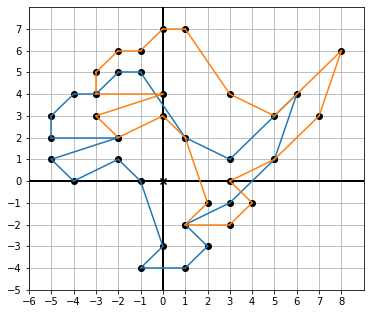

In [8]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

def translate_2d(translation_vector):
    def new_function(v):
        a, b = translation_vector
        x, y = v
        matrix = (
            (1, 0, a),
            (0, 1, b),
            (0, 0, 1)
        )
        upgraded_vector = (x, y, 2)
        x_out, y_out, _ = multiply_matrix_vector(matrix, upgraded_vector)
        return (x_out, y_out)
    return new_function


dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

translation = translate_2d((1, 1))

translated_dino_vectors = [translation(v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*translated_dino_vectors),
    Polygon2D(*translated_dino_vectors, color=orange)
)

## Exercise 5.27

Come up with a matrix to translate the dinosaur by -2 units in the x direction and -2 units in the y direction.

Execute the transformation without using the packaged function and validate the result.


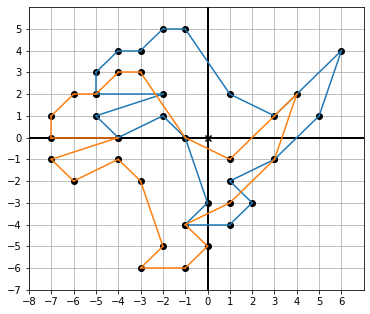

In [10]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

translation_matrix = (
    (1, 0, -2),
    (0, 1, -2),
    (0, 0, 1)
)

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

dino_vectors_3d = [(x, y, 1) for x, y in dino_vectors]

translated_dino_vectors_3d = [multiply_matrix_vector(translation_matrix, dino_vector_3d) for dino_vector_3d in dino_vectors_3d ]

translated_dino_vectors_2d = [(x, y) for x, y, _ in translated_dino_vectors_3d]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*translated_dino_vectors_2d),
    Polygon2D(*translated_dino_vectors_2d, color=orange)
)

## Exercise 5.28

Show that any matrix of the form:

$
\begin{pmatrix}
a & b & c \\
d & e & f \\
0 & 0 & 1
\end{pmatrix}
$

doesn't affect the z-coordinate of a 3D column vector it is multiplied by.

It is easy to demonstrate it algebraically:

$
\begin{pmatrix}
a & b & c \\
d & e & f \\
0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
x \\
y \\
z
\end{pmatrix} = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz \\
z
\end{pmatrix}
$

## Exercise 5.29

Find a 3x3 matrix that rotates a 2D figure in the plane z = 1 by 45°, decreases its size by a factor of 2, and translates it by the vector $ (2, 2) $.

Demonstrates that it works by applying it to the vertices of the dinosaur.

Let's identify the matrices that will do the transformations in 2D and finally, we will apply it to the translation matrix as seen in the concept section.

First of all, the matrix that rotates a figure by 45° is the following one:

$
R = \begin{pmatrix}
cos(\frac{\pi}{4}) & -cos(\frac{\pi}{4}) \\
sin(\frac{\pi}{4}) & sin(\frac{\pi}{4}) \\
\end{pmatrix}
$

Let's confirm it is correct:

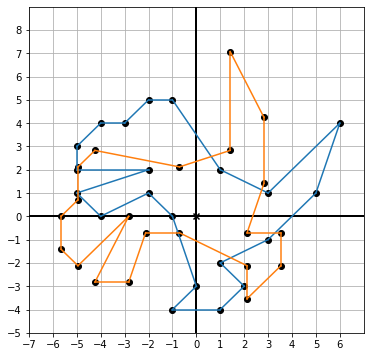

In [1]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange
from math import pi, sin, cos

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

r = (
    (cos(pi / 4), -cos(pi / 4)),
    (sin(pi / 4), sin(pi / 4))
    )

transformed_dino_vectors = [multiply_matrix_vector(r, v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*transformed_dino_vectors),
    Polygon2D(*transformed_dino_vectors, color=orange)
)

Now, let's go for the second transformation: the one that scales the figure by a factor of two:

$
S = \begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{pmatrix}
$

Let's validate it too:

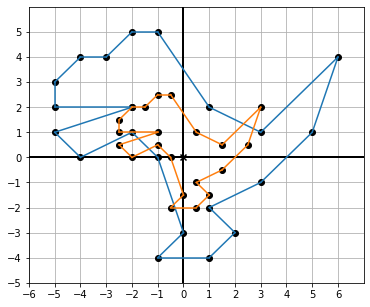

In [5]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

s = (
    (1 / 2, 0),
    (0, 1 / 2.)
    )

transformed_dino_vectors = [multiply_matrix_vector(s, v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*transformed_dino_vectors),
    Polygon2D(*transformed_dino_vectors, color=orange)
)

The next step consists in doing the composition of both transformations in 2D:

$
T = \begin{pmatrix}
cos(\frac{\pi}{4}) & -cos(\frac{\pi}{4}) \\
sin(\frac{\pi}{4}) & sin(\frac{\pi}{4}) \\
\end{pmatrix} \begin{pmatrix}
\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
$

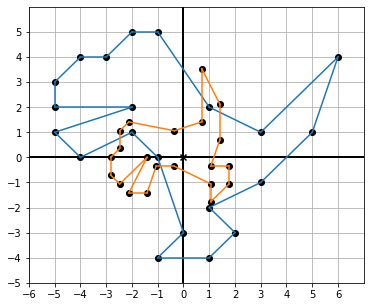

In [6]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import matrix_multiply, multiply_matrix_vector
from my_colors import blue, orange
from math import pi, sin, cos

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

r = (
    (cos(pi / 4), -cos(pi / 4)),
    (sin(pi / 4), sin(pi / 4))
    )

s = (
    (1 / 2., 0),
    (0, 1 / 2.))

t = matrix_multiply(r, s)

transformed_dino_vectors = [multiply_matrix_vector(t, v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*transformed_dino_vectors),
    Polygon2D(*transformed_dino_vectors, color=orange)
)

Now, only the translation is missing. We know from the concept section that we can substitute the 2x2 identity matrix found at the top-left of translation matrix for any transformation matrix in order to compose that transformation with the translation.

Let's see it:

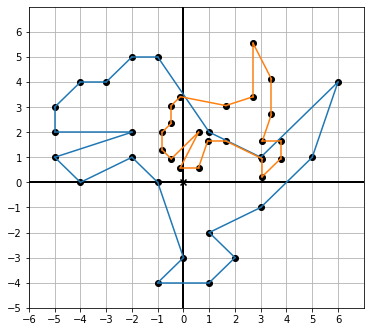

In [8]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange
from math import pi, sin, cos

def transform_and_translate_2d(transformation_matrix, translation_vector):
    def new_function(v):
        a, b = translation_vector
        x, y = v
        matrix = (
            (transformation_matrix[0][0], transformation_matrix[0][1], a),
            (transformation_matrix[1][0], transformation_matrix[1][1], b),
            (0, 0, 1)
        )
        upgraded_vector = (x, y, 1)
        x_out, y_out, _ = multiply_matrix_vector(matrix, upgraded_vector)
        return (x_out, y_out)
    return new_function


dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

r = (
    (cos(pi / 4), -cos(pi / 4)),
    (sin(pi / 4), sin(pi / 4))
    )

s = (
    (1 / 2., 0),
    (0, 1 / 2.))

transformation_matrix = matrix_multiply(r, s)

transformation_and_translation = transform_and_translate_2d(transformation_matrix, (2, 2))

transformed_dino_vectors = [transformation_and_translation(v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*transformed_dino_vectors),
    Polygon2D(*transformed_dino_vectors, color=orange)
)

## Exercise 5.30

The matrix in the preceding exercise rotates the dinosaur by 45° and then translates it (3, 1). Using matrix multiplication, build a matrix that does this in the opposite order.

Well, that is not what we did in the previous exercise but let's follow along.

The matrix that rotates the figure by 45° is:

$
T = \begin{pmatrix}
cos(\frac{\pi}{4}) & -cos(\frac{\pi}{4}) \\
sin(\frac{\pi}{4}) & sin(\frac{\pi}{4}) \\
\end{pmatrix}
$

And the matrix that translates it by (3, 1) is:

$
\begin{pmatrix}
1 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix}
$

If we first apply the rotation, then the translation we get:

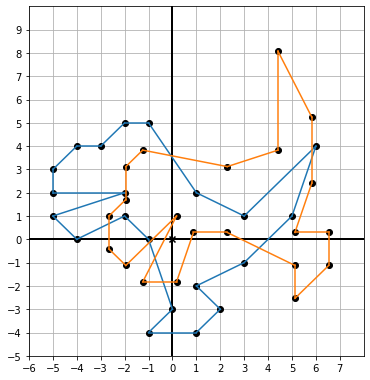

In [11]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange
from math import pi, sin, cos
from my_transformations import translate_2d

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

r = ((cos(pi / 4), -cos(pi / 4)),
    (sin(pi / 4), sin(pi / 4)))

rotated_dino_vectors = [multiply_matrix_vector(r, v) for v in dino_vectors]

translation = translate_2d((3, 1))

translated_rotated_dino_vectors = [translation(v) for v in rotated_dino_vectors]


draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*translated_rotated_dino_vectors),
    Polygon2D(*translated_rotated_dino_vectors, color=orange)
)

If we apply the matrix:

$
\begin{pmatrix}
cos(\frac{pi}{4}) & -cos(\frac{pi}{4}) & 3 \\
sin(\frac{pi}{4}) & sin(\frac{pi}{4}) & 1 \\
0 & 0 & 1
\end{pmatrix}
$


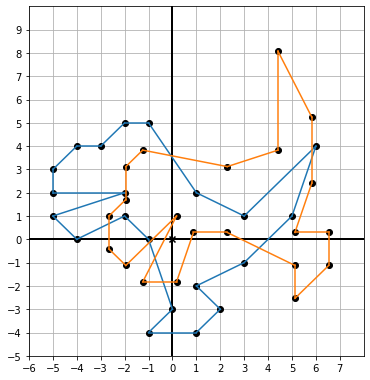

In [12]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange
from math import pi, sin, cos

def rotate_and_translate_2d(angle, translation_vector):
    def new_function(v):
        a, b = translation_vector
        x, y = v
        matrix = (
            (cos(angle), -cos(angle), a),
            (sin(angle), sin(angle), b),
            (0, 0, 1)
        )
        upgraded_vector = (x, y, 1)
        x_out, y_out, _ = multiply_matrix_vector(matrix, upgraded_vector)
        return (x_out, y_out)
    return new_function


dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

transformation_and_translation = rotate_and_translate_2d(pi / 4, (3, 1))

transformed_dino_vectors = [transformation_and_translation(v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*transformed_dino_vectors),
    Polygon2D(*transformed_dino_vectors, color=orange)
)

We see that the figure matches.

Now, let's see if we find the matrix that does this in opposite order: first translates, then rotates.

The matrix that performs the 45° rotation in the plane z = 1 will be:

$
\begin{pmatrix}
cos(\frac{pi}{4}) & -cos(\frac{pi}{4}) & 0 \\
sin(\frac{pi}{4}) & sin(\frac{pi}{4}) & 0 \\
0 & 0 & 1
\end{pmatrix}
$

The matrix that performs the translation will be:

$
\begin{pmatrix}
1 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix}
$

To compose those, we need to multiply them:

$
\begin{pmatrix}
cos(\frac{pi}{4}) & -cos(\frac{pi}{4}) & 0 \\
sin(\frac{pi}{4}) & sin(\frac{pi}{4}) & 0 \\
0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
1 & 0 & 3 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{pmatrix} = \begin{pmatrix}
cos(\frac{pi}{4}) & -cos(\frac{pi}{4}) & 2cos(\frac{pi}{4}) \\
sin(\frac{pi}{4}) & sin(\frac{pi}{4}) & 6sin(\frac{pi}{4}) \\
0 & 0 & 1
\end{pmatrix}
$

which is different from the other matrix:

$
\begin{pmatrix}
cos(\frac{pi}{4}) & -cos(\frac{pi}{4}) & 3 \\
sin(\frac{pi}{4}) & sin(\frac{pi}{4}) & 1 \\
0 & 0 & 1
\end{pmatrix}
$

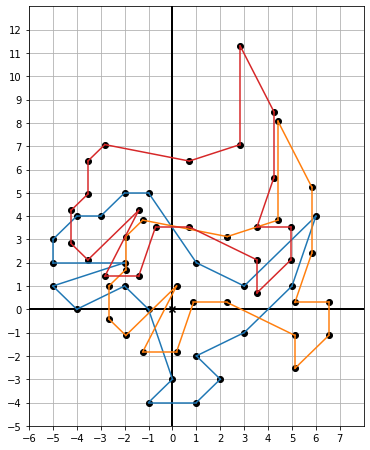

In [16]:
from my_draw2d import draw2d, Points2D, Polygon2D
from my_matrices import multiply_matrix_vector
from my_colors import blue, orange, red
from math import pi, sin, cos

def rotate_and_translate_2d(angle, translation_vector):
    def new_function(v):
        a, b = translation_vector
        x, y = v
        matrix = (
            (cos(angle), -cos(angle), a),
            (sin(angle), sin(angle), b),
            (0, 0, 1)
        )
        upgraded_vector = (x, y, 1)
        x_out, y_out, _ = multiply_matrix_vector(matrix, upgraded_vector)
        return (x_out, y_out)
    return new_function


dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

transformation_and_translation = rotate_and_translate_2d(pi / 4, (3, 1))

transformed_dino_vectors = [transformation_and_translation(v) for v in dino_vectors]

def translate_then_rotate_2d(v):
    x, y = v
    matrix = (
        (cos(pi / 4), -cos(pi / 4), 2 * cos(pi / 4)),
        (sin(pi / 4), sin(pi / 4), 6 * cos(pi / 4)),
        (0, 0, 1)
    )
    upgraded_vector = (x, y, 1)
    x_out, y_out, _ = multiply_matrix_vector(matrix, upgraded_vector)
    return (x_out, y_out)


translated_then_rotated_vectors = [translate_then_rotate_2d(v) for v in dino_vectors]

draw2d(
    Points2D(*dino_vectors),
    Polygon2D(*dino_vectors, color=blue),
    Points2D(*transformed_dino_vectors),
    Polygon2D(*transformed_dino_vectors, color=orange),
    Points2D(*translated_then_rotated_vectors),
    Polygon2D(*translated_then_rotated_vectors, color=red)    
)

Note that the rotation hasn't changed, but the dinosaur has been translated a different distance than (3, 1).

## Exercise 5.31

Write a function analogous to `translate_3d(...)` called `translate_4d(...)` that uses a 5x5 matrix to translate a 4D vector by another 4D vector. Run an example to demonstrate that the coordinates are translated.

In [19]:
from my_matrices import multiply_matrix_vector

def translate_4d(translation_vector):
    def new_function(target):
        a, b, c, d = translation_vector
        x, y, z, t = target
        matrix = (
            (1, 0, 0, 0, a),
            (0, 1, 0, 0, b),
            (0, 0, 1, 0, c),
            (0, 0, 0, 1, d),
            (0, 0, 0, 0, 1)
        )
        vector = (x, y, z, t, 1)
        x_out, y_out, z_out, t_out, _ = \
            multiply_matrix_vector(matrix, vector)
        return (x_out, y_out, z_out, t_out)
    return new_function


v = (1, 2, 3, 4)

translation_vector = (1, 1, 1, 1)

print(translate_4d(translation_vector)(v))

print(translate_4d((1, 2, 3, 4))((10, 20, 30, 40)))


(2, 3, 4, 5)
(11, 22, 33, 44)


We know from the concept section, that translation is the same as addition, and therefore, the function is correct.